In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

05/19/2020 07:33:57 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 07:33:57 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 07:33:58 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 07:33:59 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
05/19/2020 07:34:00 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

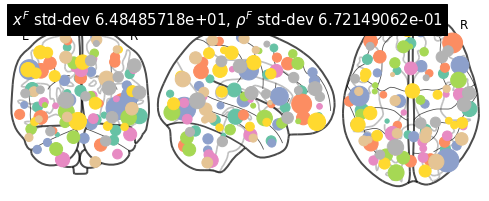

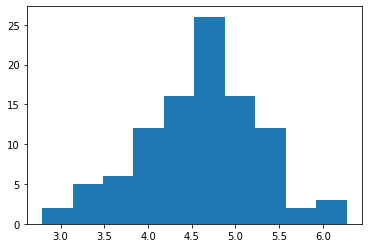

(<nilearn.plotting.displays.OrthoProjector at 0x7f8b66ba2510>,
 tensor([[-50.4265, -27.1379,  16.9889],
         [ 37.2982, -68.1019, -26.1271],
         [ 52.0480,   7.6884,  33.1868],
         [ 25.2425,  62.1121, -10.0787],
         [ -2.1097, -52.7128,  28.6811],
         [-44.8633,  26.4673,  -1.5299],
         [-24.1057, -38.3274, -30.5856],
         [-13.6747,  14.6366,  61.2915],
         [ 62.4474, -25.6424, -11.1141],
         [ 16.5127, -47.2522, -14.8430],
         [  0.2897,  43.3264,  15.5208],
         [-13.5866, -94.5620,  13.0298],
         [ 35.1851,  11.7035, -36.4755],
         [-27.9874, -10.6549, -26.4531],
         [ 36.4188, -60.3747,  45.8281],
         [-41.2485, -62.1004,  36.5628],
         [ 44.8451,  43.8033,   2.2873],
         [ 20.3198,  11.9019,   2.2124],
         [ 21.5436, -79.2318, -41.5054],
         [-41.4370,  45.6100, -12.4577],
         [-63.6936, -17.4944,  -9.2829],
         [ 36.7289,  17.8243,  51.0532],
         [-13.2887, -42.9192,  68.2

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

552

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 2e-2, 'p': 1e-2}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=haxby_db.inference_filter(training=True))

05/19/2020 07:35:17 [Epoch 1] (7647ms) Posterior free-energy 1.08540221e+10 = KL from prior 3.80120031e+05 - log-likelihood -1.08536412e+10
05/19/2020 07:35:17 Saving checkpoint...
05/19/2020 07:35:25 [Epoch 2] (7556ms) Posterior free-energy 9.83299686e+09 = KL from prior 1.30431460e+07 - log-likelihood -9.81995622e+09
05/19/2020 07:35:32 [Epoch 3] (7487ms) Posterior free-energy 9.40519014e+09 = KL from prior 2.56172219e+05 - log-likelihood -9.40493414e+09
05/19/2020 07:35:39 [Epoch 4] (7451ms) Posterior free-energy 9.19435366e+09 = KL from prior 2.67367812e+05 - log-likelihood -9.19408640e+09
05/19/2020 07:35:47 [Epoch 5] (7470ms) Posterior free-energy 9.07156173e+09 = KL from prior 3.01717000e+05 - log-likelihood -9.07125862e+09
05/19/2020 07:35:54 [Epoch 6] (7507ms) Posterior free-energy 8.98702541e+09 = KL from prior 2.72688750e+05 - log-likelihood -8.98675302e+09
05/19/2020 07:36:02 [Epoch 7] (7469ms) Posterior free-energy 8.92931891e+09 = KL from prior 2.78740344e+05 - log-likeli

Epoch   851: reducing learning rate of group 0 to 1.0000e-02.
Epoch   851: reducing learning rate of group 1 to 5.0000e-03.
Epoch   851: reducing learning rate of group 2 to 1.0000e-02.
Epoch   851: reducing learning rate of group 3 to 5.0000e-03.


05/19/2020 09:21:17 [Epoch 853] (7401ms) Posterior free-energy 6.30874061e+09 = KL from prior 2.42415175e+06 - log-likelihood -6.30631834e+09
05/19/2020 09:21:24 [Epoch 854] (7419ms) Posterior free-energy 6.20377856e+09 = KL from prior 2.41069275e+06 - log-likelihood -6.20136755e+09
05/19/2020 09:21:32 [Epoch 855] (7404ms) Posterior free-energy 6.19256371e+09 = KL from prior 2.40781725e+06 - log-likelihood -6.19015731e+09
05/19/2020 09:21:39 [Epoch 856] (7398ms) Posterior free-energy 6.18876365e+09 = KL from prior 2.40819350e+06 - log-likelihood -6.18635418e+09
05/19/2020 09:21:46 [Epoch 857] (7426ms) Posterior free-energy 6.18605670e+09 = KL from prior 2.40987225e+06 - log-likelihood -6.18364621e+09
05/19/2020 09:21:54 [Epoch 858] (7397ms) Posterior free-energy 6.18381363e+09 = KL from prior 2.40890850e+06 - log-likelihood -6.18140570e+09
05/19/2020 09:22:01 [Epoch 859] (7400ms) Posterior free-energy 6.18197146e+09 = KL from prior 2.40663275e+06 - log-likelihood -6.17956454e+09
05/19/

Epoch   996: reducing learning rate of group 0 to 5.0000e-03.
Epoch   996: reducing learning rate of group 1 to 2.5000e-03.
Epoch   996: reducing learning rate of group 2 to 5.0000e-03.
Epoch   996: reducing learning rate of group 3 to 2.5000e-03.


05/19/2020 09:39:13 [Epoch 998] (7366ms) Posterior free-energy 6.17741363e+09 = KL from prior 2.44631875e+06 - log-likelihood -6.17496781e+09
05/19/2020 09:39:20 [Epoch 999] (7345ms) Posterior free-energy 6.14681037e+09 = KL from prior 2.43931675e+06 - log-likelihood -6.14437171e+09
05/19/2020 09:39:28 [Epoch 1000] (7343ms) Posterior free-energy 6.14562611e+09 = KL from prior 2.44073050e+06 - log-likelihood -6.14318643e+09
05/19/2020 09:39:28 Saving checkpoint...


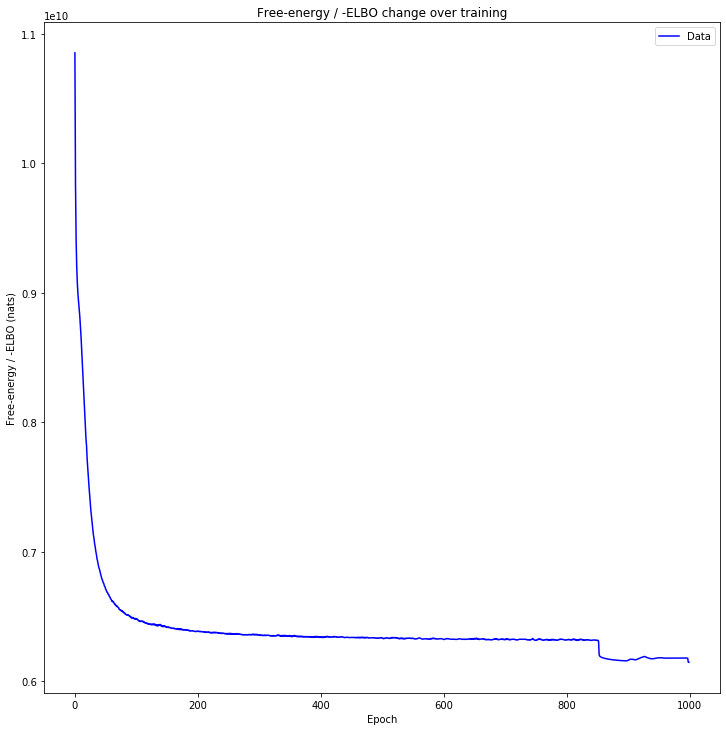

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


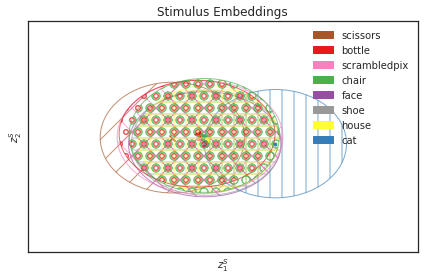

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/utils.py:149: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


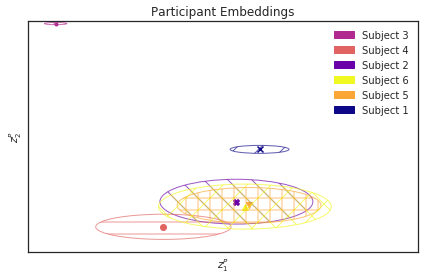

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    return task

05/19/2020 09:39:29 Plotting factors for Participant 2, run 11


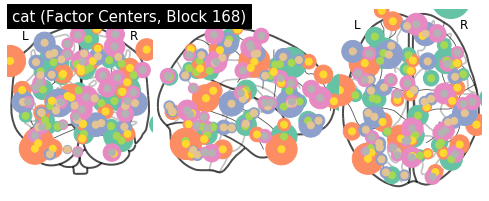

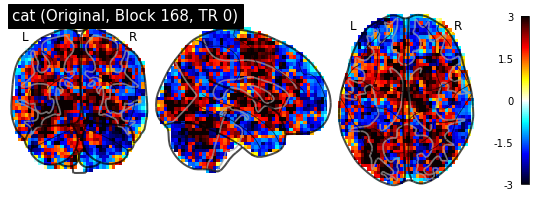

05/19/2020 09:39:31 Reconstruction Error (Frobenius Norm): 1.29797287e+02 out of 6.81110840e+02


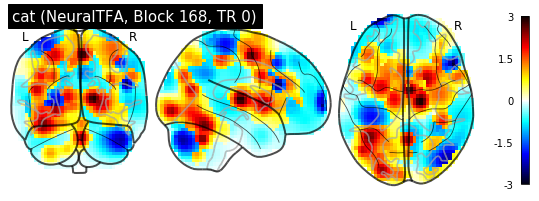

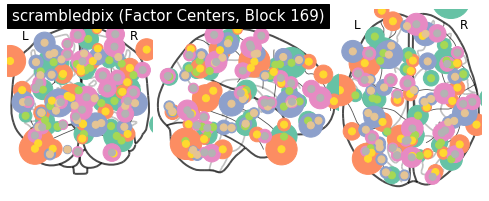

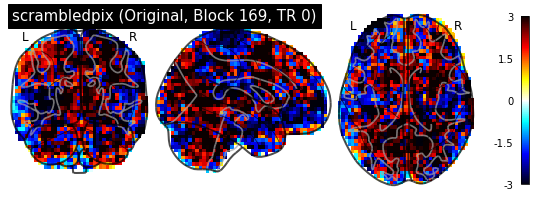

05/19/2020 09:39:34 Reconstruction Error (Frobenius Norm): 1.36769821e+02 out of 6.18631653e+02


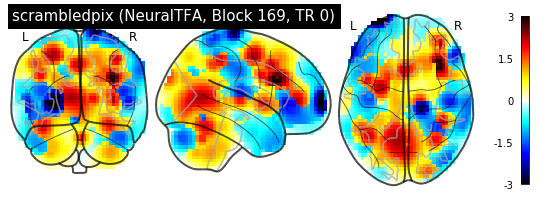

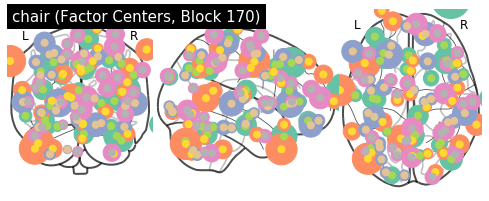

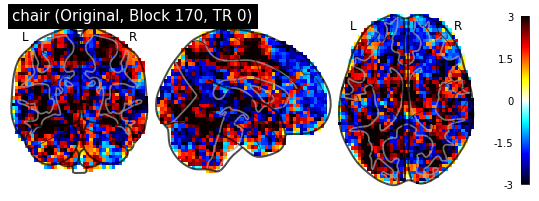

05/19/2020 09:39:37 Reconstruction Error (Frobenius Norm): 1.12614342e+02 out of 6.36665466e+02


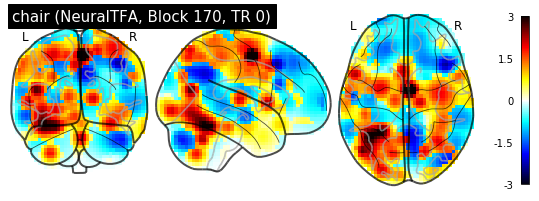

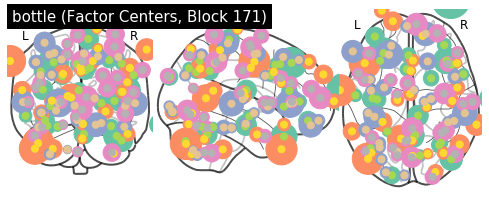

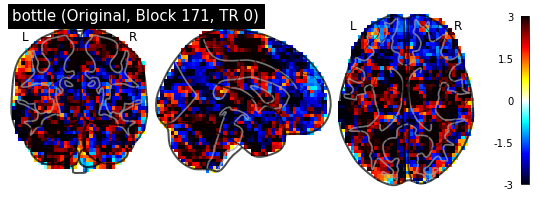

05/19/2020 09:39:40 Reconstruction Error (Frobenius Norm): 1.29866669e+02 out of 6.42774841e+02


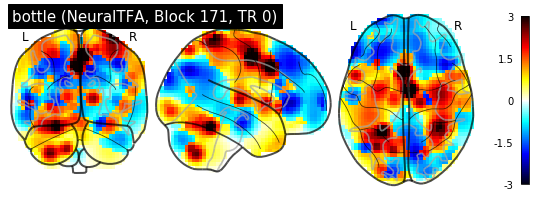

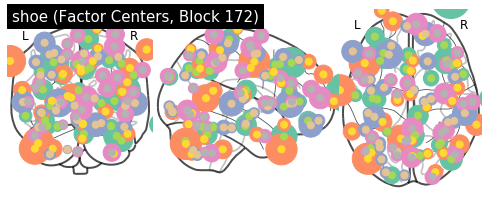

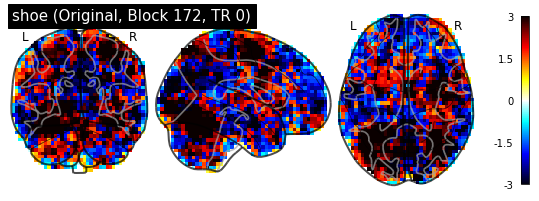

05/19/2020 09:39:43 Reconstruction Error (Frobenius Norm): 1.11063812e+02 out of 6.31538147e+02


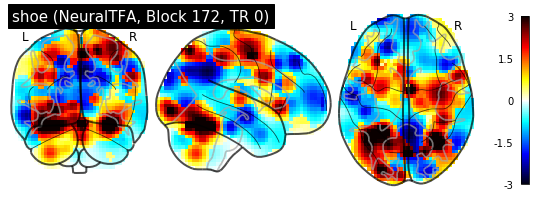

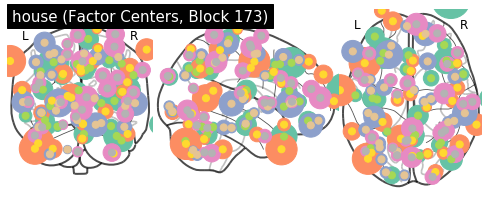

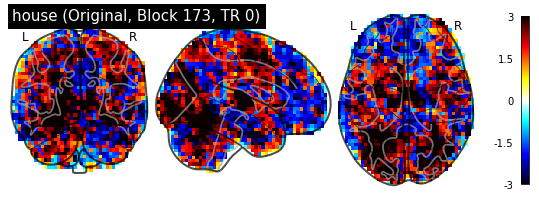

05/19/2020 09:39:46 Reconstruction Error (Frobenius Norm): 1.18970970e+02 out of 6.63159424e+02


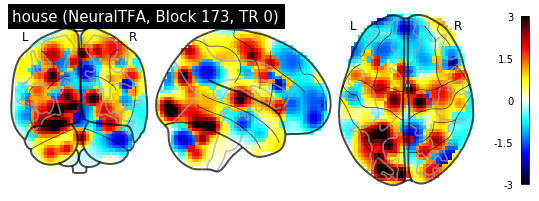

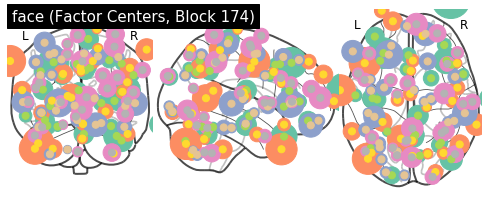

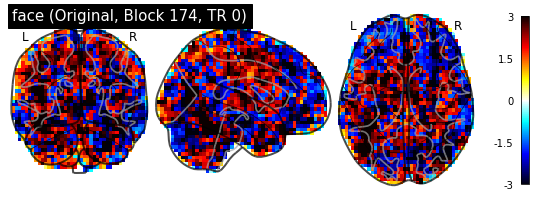

05/19/2020 09:39:48 Reconstruction Error (Frobenius Norm): 1.51216629e+02 out of 6.79094482e+02


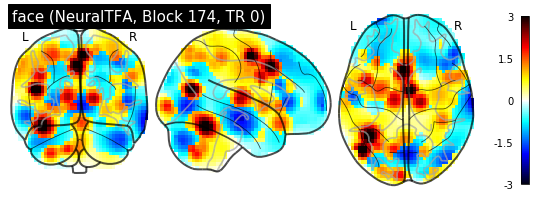

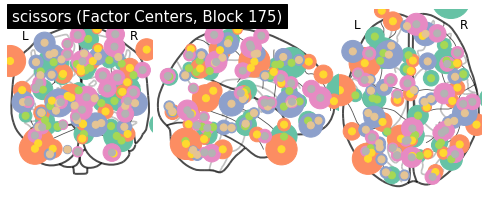

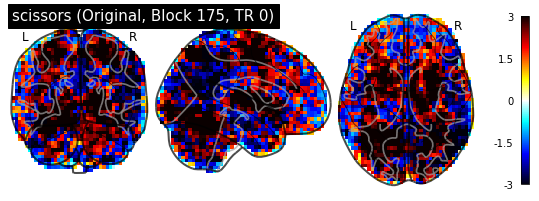

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/nilearn/plotting/displays.py:767: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
05/19/2020 09:39:51 Reconstruction Error (Frobenius Norm): 1.52400909e+02 out of 6.35086487e+02


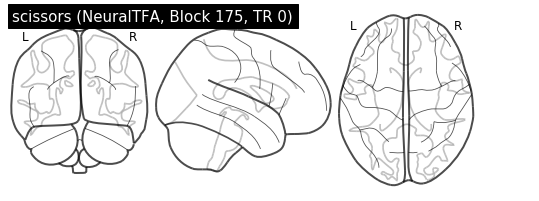

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

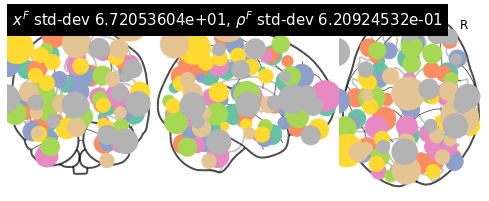

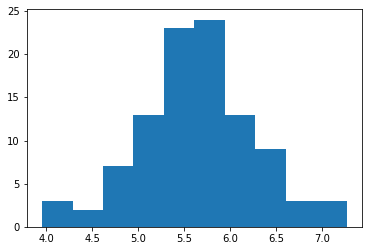

(<nilearn.plotting.displays.OrthoProjector at 0x7f8b0ed7d910>,
 tensor([[-5.5951e+01, -3.5805e+01,  3.7749e+01],
         [ 3.9054e+01, -5.8181e+01, -2.4495e+01],
         [ 4.4155e+01,  2.4073e+00,  3.7476e+01],
         [ 2.8363e+01,  6.9594e+01,  6.2742e-02],
         [-9.2881e-01, -5.3397e+01,  3.2590e+01],
         [-3.2453e+01,  2.4653e+01,  4.9537e+00],
         [-3.2294e+01, -4.7089e+01, -2.0426e+01],
         [-3.2306e+01,  1.2935e+01,  5.3661e+01],
         [ 5.6857e+01, -2.8272e+01, -8.6655e+00],
         [ 2.3391e+01, -5.4389e+01, -1.2423e+01],
         [-1.9813e+00,  2.7801e+01,  2.5788e+01],
         [-1.5088e+01, -9.0057e+01,  1.9458e+01],
         [ 3.9479e+01,  1.2344e+01, -2.9947e+01],
         [-2.4509e+01, -1.5698e+01, -1.6305e+01],
         [ 4.5801e+01, -7.6726e+01,  4.5454e+01],
         [-4.5217e+01, -6.5547e+01,  3.7886e+01],
         [ 4.1665e+01,  4.6142e+01,  1.9392e+00],
         [ 2.2707e+01,  1.5233e+01,  1.1260e+00],
         [ 2.5173e+01, -8.0683e+01, -

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

05/19/2020 09:40:03 Average reconstruction error (MSE): 5.04972024e+02 +/- 3.91257802e+01
05/19/2020 09:40:03 Average data norm (Euclidean): 6.03396825e+02 +/- 6.17218783e+01
05/19/2020 09:40:03 Percent average reconstruction error: 83.941504 +/- 3.36838444e+00


(array([561.06829834, 534.5824585 , 499.80276489, 508.77441406,
        527.10205078, 510.08822632, 514.81634521, 487.53726196,
        557.13922119, 526.70507812, 498.96316528, 450.12496948,
        471.67425537, 487.7348938 , 549.74627686, 540.36102295,
        499.20343018, 496.25839233, 469.44674683, 502.68432617,
        478.22283936, 531.07977295, 500.03338623, 510.78683472,
        614.4041748 , 548.52679443, 510.89968872, 532.85406494,
        477.80422974, 512.00445557, 515.53735352, 475.49664307,
        586.62615967, 525.77575684, 467.59289551, 491.58584595,
        531.63623047, 491.18469238, 507.56350708, 539.76165771,
        597.86334229, 499.55130005, 499.47332764, 521.23486328,
        526.68530273, 507.61553955, 542.51898193, 489.85314941,
        522.03131104, 533.16564941, 482.82595825, 455.65762329,
        505.40283203, 553.50848389, 518.68469238, 548.21990967,
        451.93212891, 450.3203125 , 466.82498169, 447.92477417,
        462.87457275, 466.21865845, 431.